In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_excel('TabellaFinale.xlsx', sheet_name=None)

In [3]:
df = df['Sheet1'].iloc[:, 1:]

In [4]:
df

HDN_CODE Sesso  ETA                DATA  ASCVD_Score  DATA_INT  \
0        2236     M   64 2021-02-26 00:00:00        27.30       422   
1        6426     M   48 2021-04-02 00:00:00         2.56       457   
2        8377     M   56 2020-08-31 00:00:00         7.80       243   
3       11463     M   71 2020-08-31 00:00:00        24.74       243   
4       11463     M   71 2021-03-31 10:54:33          NaN       456   
..        ...   ...  ...                 ...          ...       ...   
546   9417013     M   45 2020-11-05 00:00:00          NaN       309   
547   9427171     M   57 2020-10-02 00:00:00         3.42       275   
548   9427785     M   60 2020-09-22 00:00:00         9.44       265   
549   9427785     M   60 2021-03-31 11:22:13          NaN       456   
550   9428914     F   67 2020-09-21 00:00:00          NaN       264   

     num_visita  Charlson_Totale Charlson_Diabete  Stifness  ...  \
0             0              NaN              NaN       6.7  ...   
1             0              2.0           0 = No       NaN  ...   
2             0              1.0           0 = No       NaN  ...   
3             0              3.0           0 = No       NaN  ...   
4             1              NaN              NaN       NaN  ...   
..          ...              ...              ...       ...  ...   
546           0              NaN              NaN      16.5  ...   
547           0              2.0           0 = No       NaN  ...   
548           0              0.0           0 = No       NaN  ...   
549           1              NaN              NaN       NaN  ...   
550           0              NaN              NaN       NaN  ...   

     Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0          Normal             0.0         Normal                0.0   
1          Normal             4.0           Mild                7.0   
2             NaN             NaN            NaN                NaN   
3             NaN             NaN            NaN                NaN   
4          Normal             0.0         Normal                0.0   
..            ...             ...            ...                ...   
546           NaN             NaN            NaN                NaN   
547           NaN             NaN            NaN                NaN   
548           NaN             NaN            NaN                NaN   
549        Normal             0.0         Normal                3.0   
550           NaN             NaN            NaN                NaN   

     Depression level  Insomnia severity index  \
0              Normal                      8.0   
1            Moderate                      6.0   
2                 NaN                      NaN   
3                 NaN                      NaN   
4              Normal                      0.0   
..                ...                      ...   
546               NaN                      NaN   
547               NaN                      NaN   
548               NaN                      NaN   
549            Normal                      7.0   
550               NaN                      NaN   

                              ISI level  SF36 general health Resilience  \
0                 Subthreshold Insomnia                 75.0       64.0   
1    No Clinically Significant Insomnia                 10.0       54.0   
2                                   NaN                  NaN        NaN   
3                                   NaN                  NaN        NaN   
4    No Clinically Significant Insomnia                 90.0       88.0   
..                                  ...                  ...        ...   
546                                 NaN                  NaN        NaN   
547                                 NaN                  NaN        NaN   
548                                 NaN                  NaN        NaN   
549  No Clinically Significant Insomnia                 75.0       69.0   
550                                 NaN                 

<AxesSubplot:>

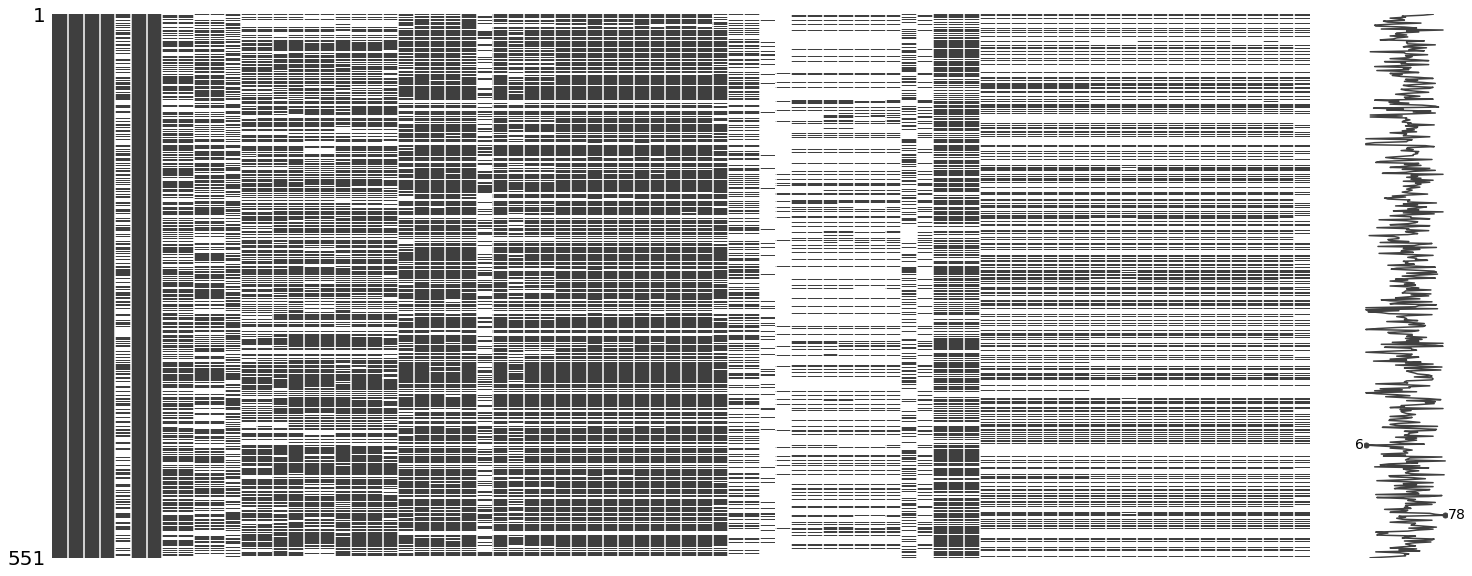

In [5]:
msno.matrix(df)

In [6]:
df.loc[df['Outcome'].isna(), 'Outcome'] = -1

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if col != 'Outcome':
        if dt == int or dt == float:
            df[col].fillna(0, inplace=True)
        else:
            df[col].fillna("", inplace=True)

<AxesSubplot:>

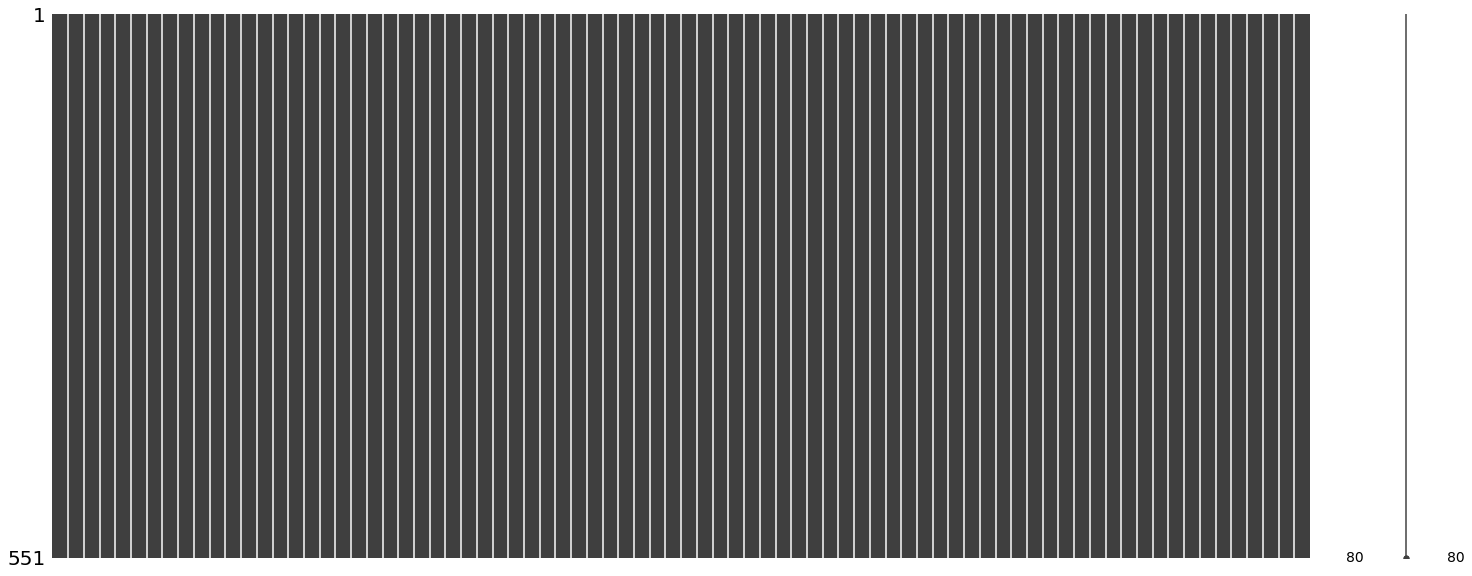

In [7]:
msno.matrix(df)

In [8]:
df['Sesso'].replace({'M':0, 'F':1}, inplace=True)

In [9]:
df['Charlson_Diabete'].replace({'0 = No':0, 
                                '1 = Senza complicazioni':1,
                                '2 = Con danneggiamento degli organi':2,
                                '':0
                               }, inplace=True)

In [10]:
df['Pneumo_ScalaBorg'].replace({'0 - nessuna':0, 
                                '0,5 - molto molto lieve':0.5,
                                '1 - molto lieve':1,
                                '2 - lieve':2,
                                '3 - moderata':3,
                                '4 - piuttosto intensa':4,
                                '5 - intensa':5,
                                '':0
                               }, inplace=True)

In [11]:
df['TestCammino6Min_BorgBase'].replace({'0 - nessuna':0, 
                                '0,5 - molto molto lieve':0.5,
                                '1 - molto lieve':1,
                                '2 - lieve':2,
                                '3 - moderata':3,
                                '4 - piuttosto intensa':4,
                                '5 - intensa':5,
                                '':0
                               }, inplace=True)

In [12]:
df['TestCammino6Min_BorgEnd'].replace({'0 - nessuna':0, 
                                '0,5 - molto molto lieve':0.5,
                                '1 - molto lieve':1,
                                '2 - lieve':2,
                                '3 - moderata':3,
                                '4 - piuttosto intensa':4,
                                '5 - intensa':5,
                                '6 -':6,
                                '7 - molto intensa':7,
                                '':0
                               }, inplace=True)

In [13]:
df['CogStateScore_Esito'].replace({'0 - normal range':0, 
                                '1 - borderline':1,
                                '2 - mild impairment':2,
                                '3 - moderate impairment':3,
                                '4 - severe impairment':4,
                                '5 - intensa':5,
                                '6 -':6,
                                '7 - molto intensa':7,
                                '':0
                                  }, inplace=True)

In [14]:
df['Stress level'].replace({'Normal':0,
                            'Mild':1,
                            'Moderate':2,
                            'Severe':3,
                            'Extremely Severe':4,
                            '':0
                            }, inplace=True)

In [15]:
df['Anxiety level'].replace({'Normal':0,
                            'Mild':1,
                            'Moderate':2,
                            'Severe':3,
                            'Extremely Severe':4,
                            '':0
                            }, inplace=True)

In [16]:
df['Depression level'].replace({'Normal':0,
                            'Mild':1,
                            'Moderate':2,
                            'Severe':3,
                            'Extremely Severe':4,
                            '':0
                            }, inplace=True)

In [17]:
df['ISI level'].replace({'No Clinically Significant Insomnia':0,
                         'Subthreshold Insomnia':1,
                         'Clinical Insomnia (Moderate Severity)':2,
                         'Clinical Insomnia (Severe)':3,
                         '':0
                         }, inplace=True)

In [18]:
df.to_excel('TabellaFinaleSenzaNaN_con_0.xlsx')
df.to_csv('TabellaFinaleSenzaNaN_con_0.csv')

In [19]:
df

HDN_CODE  Sesso  ETA                DATA  ASCVD_Score  DATA_INT  \
0        2236      0   64 2021-02-26 00:00:00        27.30       422   
1        6426      0   48 2021-04-02 00:00:00         2.56       457   
2        8377      0   56 2020-08-31 00:00:00         7.80       243   
3       11463      0   71 2020-08-31 00:00:00        24.74       243   
4       11463      0   71 2021-03-31 10:54:33         0.00       456   
..        ...    ...  ...                 ...          ...       ...   
546   9417013      0   45 2020-11-05 00:00:00         0.00       309   
547   9427171      0   57 2020-10-02 00:00:00         3.42       275   
548   9427785      0   60 2020-09-22 00:00:00         9.44       265   
549   9427785      0   60 2021-03-31 11:22:13         0.00       456   
550   9428914      1   67 2020-09-21 00:00:00         0.00       264   

     num_visita  Charlson_Totale  Charlson_Diabete  Stifness  ...  \
0             0              0.0                 0       6.7  ...   
1             0              2.0                 0       0.0  ...   
2             0              1.0                 0       0.0  ...   
3             0              3.0                 0       0.0  ...   
4             1              0.0                 0       0.0  ...   
..          ...              ...               ...       ...  ...   
546           0              0.0                 0      16.5  ...   
547           0              2.0                 0       0.0  ...   
548           0              0.0                 0       0.0  ...   
549           1              0.0                 0       0.0  ...   
550           0              0.0                 0       0.0  ...   

     Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0               0             0.0              0                0.0   
1               0             4.0              1                7.0   
2               0             0.0              0                0.0   
3               0             0.0              0                0.0   
4               0             0.0              0                0.0   
..            ...             ...            ...                ...   
546             0             0.0              0                0.0   
547             0             0.0              0                0.0   
548             0             0.0              0                0.0   
549             0             0.0              0                3.0   
550             0             0.0              0                0.0   

     Depression level  Insomnia severity index  ISI level  \
0                   0                      8.0          1   
1                   2                      6.0          0   
2                   0                      0.0          0   
3                   0                      0.0          0   
4                   0                      0.0          0   
..                ...                      ...        ...   
546                 0                      0.0          0   
547                 0                      0.0          0   
548                 0                      0.0          0   
549                 0                      7.0          0   
550                 0                      0.0          0   

     SF36 general health  Resilience  Outcome  
0                   75.0        64.0      1.0  
1                   10.0        54.0      0.0  
2                    0.0         0.0     -1.0  
3                    0.0         0.0     -1.0  
4                   90.0        88.0      3.0  
..                   ...         ...      ...  
546                  0.0         0.0     -1.0  
547                  0.0         0.0     -1.0  
548                  0.0         0.0     -1.0  
549                 75.0        69.0      1.0  
550                  0.0         0.0     -1.0  

[551 rows x 80 columns]

In [20]:
df.isna().any().value_counts()

False    80
dtype: int64